In [9]:
import numpy as np
import matplotlib.pyplot as plt

import pywt.data
import sys
import cv2

if '..' not in sys.path:
    sys.path.append('..')



In proposed MDLE-IWT method, 
1. IWT is first appliedto the cover image to obtain four wavelet coefficient sub-bands asembedding regions.
1. The embedding sub-bands order in the algorithm is HL, LH, HH, and LL. 
1. Next, the embedding sub-band is divided into 3×3 non-overlapping blocks
1. MDLE scheme is applied to each block


In [10]:
from stego import codec
from stego.message import message_to_dec, dec_to_message
from stego.transform.dwt import Iwt


class StegoCoder:
    def __init__(self):
        self.iwt = Iwt('haar', level=3, scale=1)

    def encode(self, img, message):
        self.iwt.forward(img)
        ll = self.iwt.coefficients[0]
        coefficients = self.iwt.coefficients[-1]

        msg_iterator = iter(message_to_dec(message))
        coefficients_new = [codec.encode_band(band, msg_iterator) for band in coefficients]

        self.iwt.coefficients[-1] = tuple(coefficients_new)

        return self.iwt.inverse()

    def decode(self, img):
        self.iwt.forward(img)
        ll = self.iwt.coefficients[0]
        coefficients = self.iwt.coefficients[-1]

        extracted_data = []
        for band in coefficients:
            extracted_data += codec.decode_band(band)
        extracted_data += codec.decode_band(ll)

        return dec_to_message(extracted_data)

## Encoding

In [11]:
from stego import correction_codes, image_coder

secret_message = correction_codes.prepare_message("Apollo 17")
original = pywt.data.camera()
stego_coder = StegoCoder()

In [12]:
stego_img = stego_coder.encode(original, secret_message)

## Stego Image

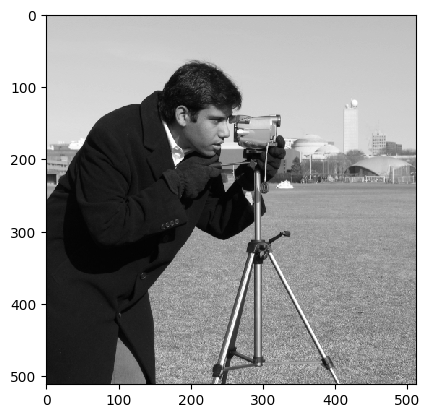

In [13]:
plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
# cv2.imwrite("comp.jpg", stego_img)
# img = cv2.imread("comp.jpg")
# stego_from_file, g, b = cv2.split(img)
# print(f"{np.allclose(stego_img, stego_from_file)=}")
# stego_img = stego_from_file
# plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
# stego_img.shape


## Extracting

In [14]:
message = stego_coder.decode(stego_img)

In [15]:
print(f"{message[:50]=}")

message[:50]='Apollo 17P\x07Û3Y\x955\x1eãÉ\x06\x92Wã\nÚ·hý\x1f¡°\x922ÑN\x05\x854±ù)t\x16\x9eß\x8câa×!'


In [16]:
correction_codes.decode_message(message[:50])

''